This figure is showing that the channel that they genetically inserted into the neuron causes current to flow into the neuron upon exposure to light. I like that it shows the raw current traces, which are very familiar and compelling for people familiar with neural data. I also like that they start with the simplest case and gradually get more complex.
I don't like that they use barplots, because they suck. I also think that adding color to show light onset time, and perhaps having a key that indicates what light onset is could be helpful.

I feel that the inset in plot b does not actually make it any easier to see any data, and is just adding complexity. I think the photo in a really adds nothing - most people are familiar with cultured neurons. An experimental schematic would be more informative.

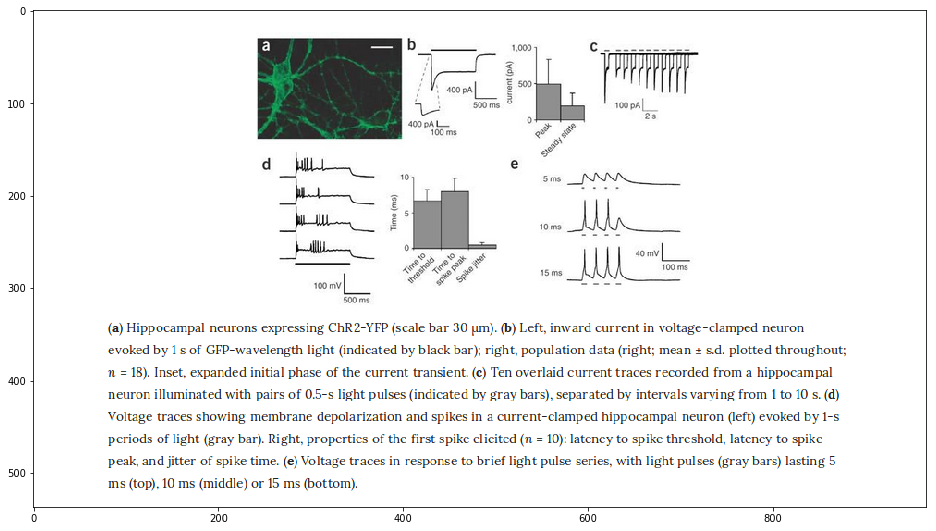

In [8]:
import glob
from skimage import io
import matplotlib.pyplot as plt
paths = glob.glob('/home/hayley/bounds_ay250_homework/hw_2/*')
f, x = plt.subplots()
plt.imshow(io.imread(paths[4]))
f.set_size_inches(16,16)

For problem number 2 graph, see python file, since I had trouble with interactivity in jupyter.

I had a lot of trouble creating this plot. I decided that what I would like to know would be the names of the supercomputers and gpus, so that I could learn more about what data the graph was pulling from. Unfortunately, I didn't have access to this, so I made up names. The data was too dense, so I thought pulling a random subset could still yet the user explore without being overwhelming.
I think it gives the user a better idea of whats out there, but I'm not sure it helps make the take home message clearer.

Problem number 3

In [ ]:
import glob 
data_paths = glob.glob('/home/hayley/bounds_ay250_homework/hw_2/hw_2_data/*')
data_paths

In [ ]:
import pandas as pd
temps = pd.read_csv(data_paths[1], sep='\t', index_col = 0)
google = pd.read_csv(data_paths[2], sep='\t', index_col = 0)
yahoo = pd.read_csv(data_paths[5],sep='\t', index_col = 0)

In [ ]:
merger = yahoo.merge(google,left_index=True, right_index = True, how = 'left')
merger = merger.merge(temps,left_index=True, right_index = True, how = 'right')
merger.sort_index()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
temp_nas = merger['Max Temperature'].notnull()
stock_nas = merger['Stock Value_x'].notnull()

fig, ax1 = plt.subplots()
fig.set_size_inches(8,6)
yah, = ax1.plot(merger.index[stock_nas], merger['Stock Value_x'][stock_nas], 'm-')
yah.set_label('Yahoo Stock Value')
goog, = ax1.plot(merger.index[stock_nas], merger['Stock Value_y'][stock_nas], 'b-')
goog.set_label('Google Stock Value')
#label axis
ax1.set_ylabel('Value (Dollars)')

#play with axes
ax1.minorticks_on()
ax1.tick_params('both', which = 'both', direction = 'in')

#the temp axes are technically separate
ax2 = ax1.twinx()
temp, = ax2.plot(merger.index[temp_nas], merger['Max Temperature'][temp_nas], 'r--')
temp.set_label('NY Mon. High Temp')
#label axis
ax2.set_ylabel(r'Temperature ($\degree$ C)')

#set up the axes to be correct
ax2.set_ylim([-150, 100])
ax2.minorticks_on()
ax2.tick_params('both', which = 'both', direction = 'in')

#and adjust the x
ax2.set_xlabel('Date (MJD)')

#and a title 
plt.title('New York Temperatures, Google, and Yahoo!')
#create legend based on whole figure
fig.legend(loc = (.1,.3), frameon=False)

# # Extra Crediiiiiit

In [ ]:
import seaborn as sns
import numpy as np
data = sns.load_dataset('iris')

#based on the number of columns, create subplots
n_cols = len(data.columns)
f, axes = plt.subplots(n_cols, n_cols)

for i=range(0, ncol):
    for j = range(0, ncol):
        